# 統計的推定

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['点数'])

In [3]:
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.530, 206.669)

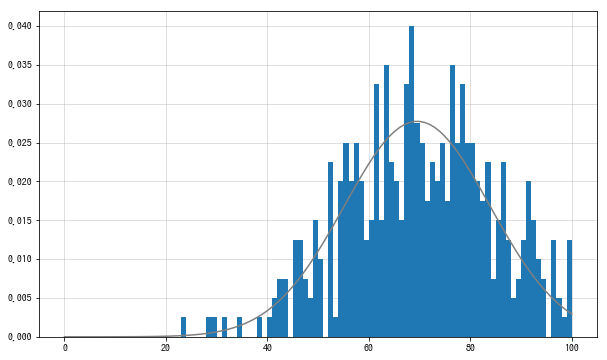

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=100, range=(0, 100), density=True)

plt.show()

In [5]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81])

In [6]:
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

## 点推定

### 母平均の点推定

In [7]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}回目の標本平均: {s_mean:.3f}')

1回目の標本平均: 67.000
2回目の標本平均: 72.850
3回目の標本平均: 69.200
4回目の標本平均: 64.450
5回目の標本平均: 72.650


In [8]:
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.538

In [9]:
np.mean(np.random.choice(scores, int(1e6)))

69.543

In [10]:
s_mean = np.mean(sample)
s_mean

70.400

### 母分散の点推定

In [11]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}回目の標本分散: {s_var:.3f}')

1回目の標本分散: 116.800
2回目の標本分散: 162.928
3回目の標本分散: 187.060
4回目の標本分散: 149.148
5回目の標本分散: 111.528


In [12]:
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.344

In [13]:
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.678

In [14]:
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.083

In [15]:
u_var = np.var(sample, ddof=1)
u_var

158.253

## 区間推定

### 正規分布の母平均(分散既知)の区間推定

In [16]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(64.100, 76.700)

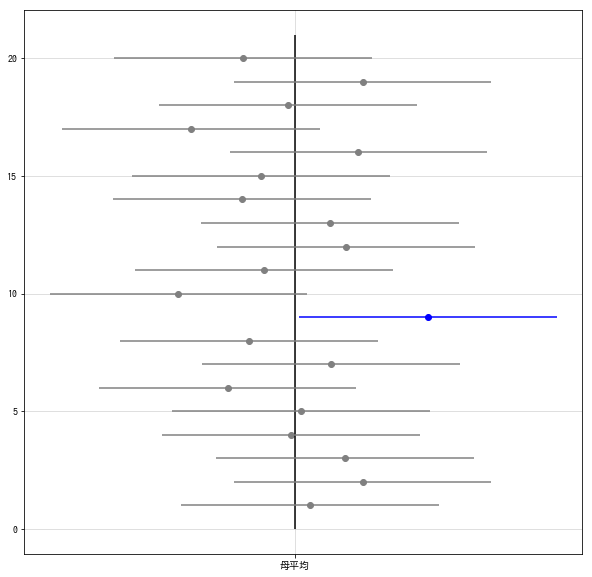

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['母平均'])

plt.show()

In [18]:
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)

0.951

### 正規分布の母分散(平均未知)の区間推定

In [19]:
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([ 11.303,  15.767,  18.102, ...,  19.435,   9.265,  18.625])

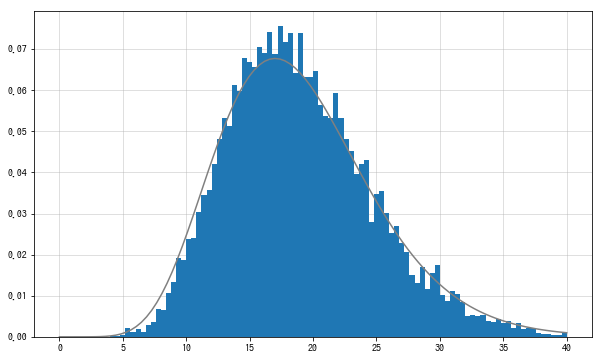

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='gray')
hist, _, _ = ax.hist(sample_y, bins=100,
                     range=(0, 40), density=True)

plt.show()

In [21]:
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl

(91.525, 337.596)

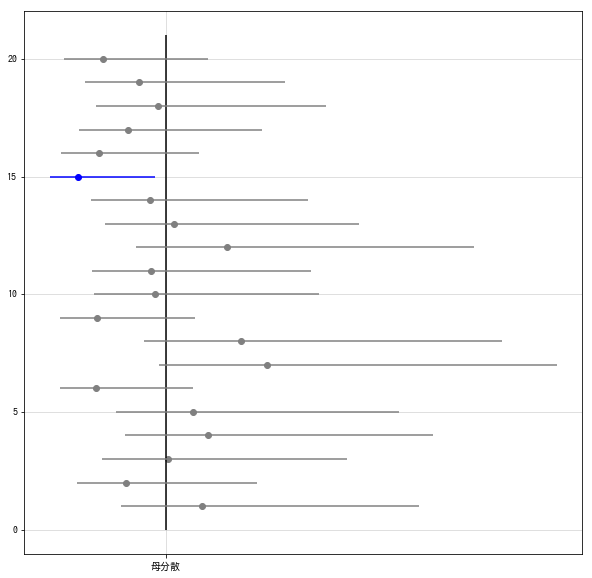

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['母分散'])

plt.show()

In [23]:
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
        
cnt / len(samples)

0.964

### 正規分布の母平均(母分散未知)の区間推定

In [24]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(64.512, 76.288)

### ベルヌーイ分布の母平均の区間推定

In [25]:
enquete_df = pd.read_csv('../data/ch10_enquete.csv')
enquete = np.array(enquete_df['知っている'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [26]:
s_mean = enquete.mean()
s_mean

0.709

In [27]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl

(0.681, 0.737)

### ポアソン分布の母平均の区間推定

In [28]:
n_access_df = pd.read_csv('../data/ch10_access.csv')
n_access = np.array(n_access_df['アクセス数'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8])

In [29]:
s_mean = n_access.mean()
s_mean

10.444

In [30]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

(9.698, 11.191)